## Jacques Audiard comment about Spanish being a language of the poor

#### Author: Felipe Valencia-Clavijo

The director of the movie Emilia Perez said: "Spanish is a language of modest countries, of developing countries, of the poor and migrants".

I noticed that many people were commenting online about how biased this comment was, pointing that some French-speaking countries are amongst the poorest of the world, like Haiti and other African countries.

This picked my curiosity and so i decided to test the data to discover how rich or poor French-speaking countries are compared to Spanish-speaking ones.

First, we need to install the gapminder package to get GDP per Capita data of countries through time.

In [23]:
#%pip install gapminder

Let's get the data from Gapminder.

In [24]:
from gapminder import gapminder

# Load the dataset as a Pandas DataFrame
df = gapminder.copy()

# Display
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Let's find what countries are available.

In [25]:
print(df.country.unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Australia'
 'Austria' 'Bahrain' 'Bangladesh' 'Belgium' 'Benin' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Finland'
 'France' 'Gabon' 'Gambia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kenya' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kuwait'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar

Using information from Wikipedia and ChatGPT we identified the Spanish-speaking and French-speaking countries.

In [26]:
# List of Spanish-speaking countries
spanish_speaking_countries = [
    "Argentina", "Bolivia", "Chile", "Colombia", "Costa Rica", "Cuba",
    "Dominican Republic", "Ecuador", "El Salvador", "Guatemala",
    "Honduras", "Mexico", "Nicaragua", "Panama", "Paraguay",
    "Peru", "Spain", "Uruguay", "Venezuela"
]

# List of French-speaking countries
# NOTE: 'Luxembourg', 'Seychelles', and 'Vanuatu' are not included in Gapminder
french_speaking_countries = [
    "France", "Belgium", "Switzerland", "Canada",
    "Congo, Dem. Rep.", "Madagascar", "Cameroon",
    "Cote d'Ivoire", "Burkina Faso", "Niger", "Senegal", "Mali",
    "Rwanda", "Chad", "Guinea", "Benin", "Burundi", "Togo",
    "Central African Republic", "Congo, Rep.", "Gabon",
    "Djibouti", "Haiti", "Comoros",
]

# "Equatorial Guinea" removed because it is in both French and Spanish-speaking

Let's generate columns to categorise the countries by the language they speak. (A Spanish version was made too)

In [27]:
# Function to categorize the language
def get_language(country):
    if country in spanish_speaking_countries:
        return 'Spanish-speaking'
    elif country in french_speaking_countries:
        return 'French-speaking'
    else:
        return None  # or 'Other' if you'd prefer a category for non-Spanish/French countries
    
# Function to categorize the language
def get_language_spa(country):
    if country in spanish_speaking_countries:
        return 'Hispanohablantes'
    elif country in french_speaking_countries:
        return 'Francófonos'
    else:
        return None  # or 'Other' if you'd prefer a category for non-Spanish/French countries

# Create the 'Language' column
df['Language'] = df['country'].apply(get_language)
# Create the 'Lenguaje' column in spanish
df['Lenguaje'] = df['country'].apply(get_language_spa)


Let's filter now the dataset to only focus on the countries for our study.

In [28]:
# Filter the dataframe for rows where the Language is either 'Spanish' or 'French'
filtered_df = df[df['Language'].isin(['Spanish-speaking', 'French-speaking'])]
filtered_df

,country,continent,year,lifeExp,pop,gdpPercap,Language,Lenguaje
48,Argentina,Americas,1952,62.485,17876956,5911.315053,Spanish-speaking,Hispanohablantes
49,Argentina,Americas,1957,64.399,19610538,6856.856212,Spanish-speaking,Hispanohablantes
50,Argentina,Americas,1962,65.142,21283783,7133.166023,Spanish-speaking,Hispanohablantes
51,Argentina,Americas,1967,65.634,22934225,8052.953021,Spanish-speaking,Hispanohablantes
52,Argentina,Americas,1972,67.065,24779799,9443.038526,Spanish-speaking,Hispanohablantes
...,...,...,...,...,...,...,...,...
1639,Venezuela,Americas,1987,70.190,17910182,9883.584648,Spanish-speaking,Hispanohablantes
1640,Venezuela,Americas,1992,71.150,20265563,10733.926310,Spanish-speaking,Hispanohablantes
1641,Venezuela,Americas,1997,72.146,22374398,10165.495180,Spanish-speaking,Hispanohablantes
1642,Venezuela,Americas,2002,72.766,24287670,8605.047831,Spanish-speaking,Hispanohablantes


In [29]:
filtered_agg_df = filtered_df.groupby(['Language', 'year'])['gdpPercap'].mean().reset_index()
filtered_agg_df

,Language,year,gdpPercap
0,French-speaking,1952,2792.262204
1,French-speaking,1957,3190.508955
2,French-speaking,1962,3606.013730
3,French-speaking,1967,4129.929037
4,French-speaking,1972,4927.338367
5,French-speaking,1977,5623.540396
6,French-speaking,1982,5674.880973
7,French-speaking,1987,5849.155101
8,French-speaking,1992,6077.776105
9,French-speaking,1997,6313.756326


Perform an appropriate statistical test. In this case a Paired T-test.

In [30]:
import scipy.stats as stats

# Pivot the data to ensure paired structure
paired_df = filtered_agg_df.pivot(index='year', columns='Language', values='gdpPercap')

# Perform paired t-test
t_test_paired = stats.ttest_rel(paired_df['French-speaking'], paired_df['Spanish-speaking'])
print("Paired T-test results:", t_test_paired)


Paired T-test results: TtestResult(statistic=-7.033051287813049, pvalue=2.173939485473413e-05, df=11)


Robustness check with a non-parametric Wilcoxon signed-rank test.

In [31]:
import scipy.stats as stats

# Perform Wilcoxon signed-rank test (non-parametric alternative to paired t-test)
wilcoxon_test = stats.wilcoxon(paired_df['French-speaking'], paired_df['Spanish-speaking'])

print("Wilcoxon signed-rank test results:", wilcoxon_test)


Wilcoxon signed-rank test results: WilcoxonResult(statistic=0.0, pvalue=0.00048828125)


Let's generate the parameters and the style for our graphs.

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define the custom colour palette for Spanish and French languages
palette = {'Spanish-speaking': 'red', 'French-speaking': 'darkblue'}

# Define the custom colour palette for Spanish and French languages
palette_spa = {'Hispanohablantes': 'red', 'Francófonos': 'darkblue'}

# Set plot style for a clean look
sns.set_style("white")
sns.despine()

# Set the font to Roboto
plt.rcParams['font.family'] = 'Arial'

<Figure size 640x480 with 0 Axes>

## Plot 1: GDP per capita over time by language

Engish version:

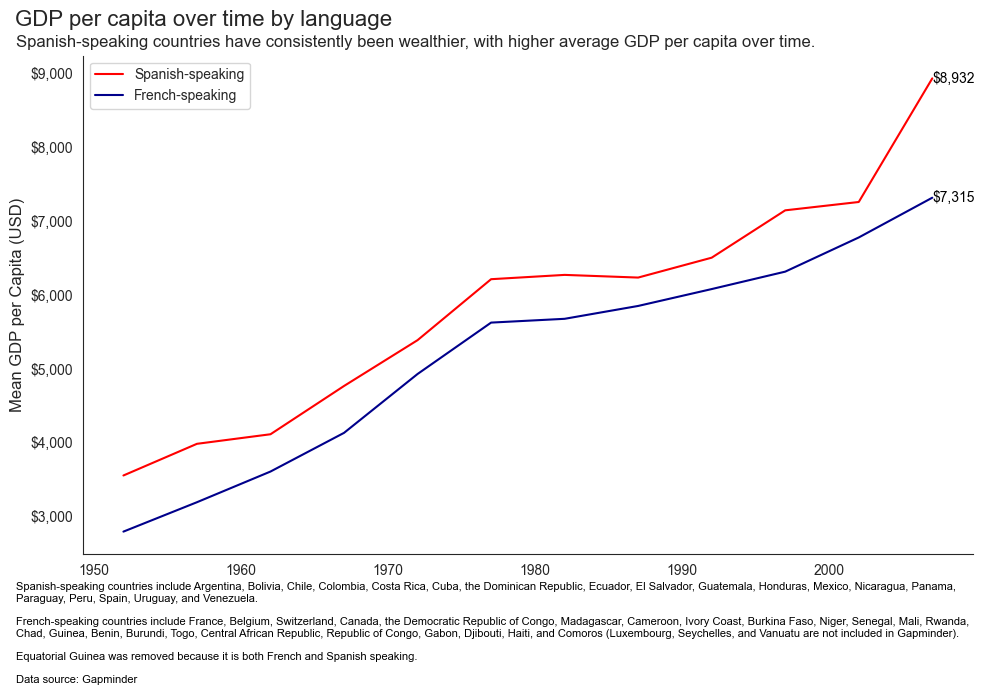

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the line chart with confidence intervals
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='year', y='gdpPercap', hue='Language', errorbar=None, palette=palette)

# Adding title and subtitle
plt.title('GDP per capita over time by language\n\n', fontsize=16, x=0.135, y=0.95)
plt.figtext(0.021, 0.91, 'Spanish-speaking countries have consistently been wealthier, with higher average GDP per capita over time.', fontsize=12)

# Adding labels
plt.xlabel('')
plt.ylabel('Mean GDP per Capita (USD)', fontsize=12)

# Format y-axis to show USD with commas
formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Add annotations for the final values
languages = filtered_df['Language'].unique()  # Get unique languages
for language in languages:
    # Get the subset of the dataframe for the current language
    subset = filtered_df[filtered_df['Language'] == language]
    
    # Get the last year and corresponding GDP for the current language
    last_year = subset['year'].max()
    last_gdp = subset[subset['year'] == last_year]['gdpPercap'].mean()
    
    # Annotate the final GDP value at the last year for each language
    plt.text(last_year, last_gdp, f'${last_gdp:,.0f}', 
             horizontalalignment='left', 
             verticalalignment='center', 
             fontsize=10, 
             color='black')

# Add a note below the plot
plt.figtext(0.021, -0.15, 'Spanish-speaking countries include Argentina, Bolivia, Chile, Colombia, Costa Rica, Cuba, the Dominican Republic, Ecuador, El Salvador, Guatemala, Honduras, Mexico, Nicaragua, Panama,\nParaguay, Peru, Spain, Uruguay, and Venezuela.\n\nFrench-speaking countries include France, Belgium, Switzerland, Canada, the Democratic Republic of Congo, Madagascar, Cameroon, Ivory Coast, Burkina Faso, Niger, Senegal, Mali, Rwanda,\nChad, Guinea, Benin, Burundi, Togo, Central African Republic, Republic of Congo, Gabon, Djibouti, Haiti, and Comoros (Luxembourg, Seychelles, and Vanuatu are not included in Gapminder).\n\nEquatorial Guinea was removed because it is both French and Spanish speaking.\n\nData source: Gapminder', 
            fontsize=8, color='black')

# Adjust the legend location
plt.legend(loc='upper left')

sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout to avoid cutting off elements

# Save plot as PNG
plt.savefig("plot1_en.png", dpi=300, bbox_inches="tight")

plt.show()

Spanish version:

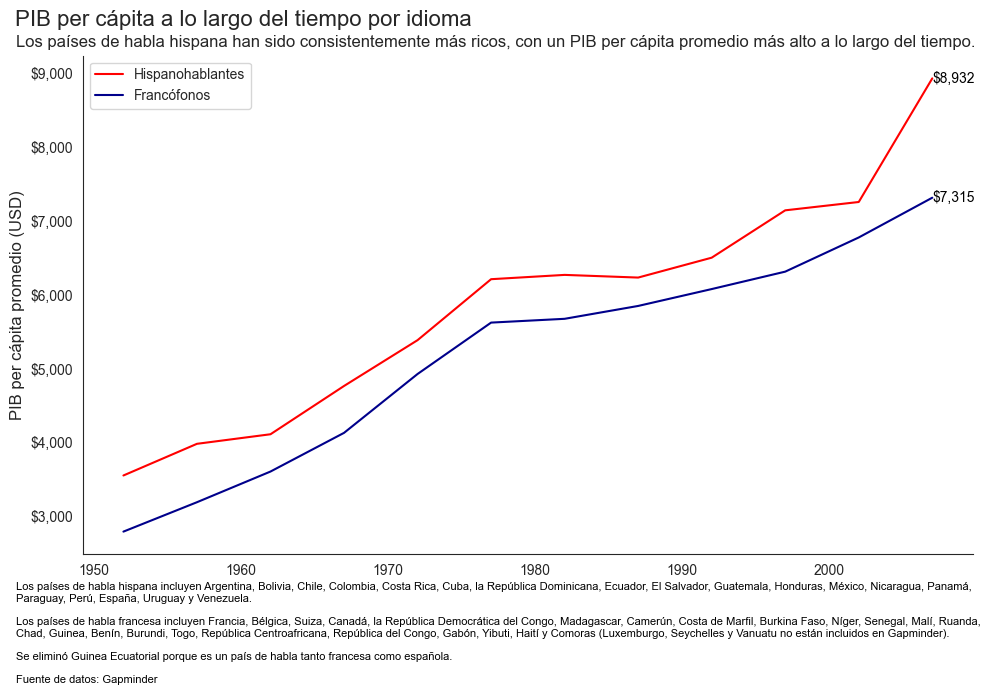

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the line chart with confidence intervals
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='year', y='gdpPercap', hue='Lenguaje', errorbar=None, palette=palette_spa)

# Adding title and subtitle
plt.title('PIB per cápita a lo largo del tiempo por idioma\n\n', fontsize=16, x=0.18, y=0.95)
plt.figtext(0.021, 0.91, 'Los países de habla hispana han sido consistentemente más ricos, con un PIB per cápita promedio más alto a lo largo del tiempo.', fontsize=12)

# Adding labels
plt.xlabel('')
plt.ylabel('PIB per cápita promedio (USD)', fontsize=12)

# Format y-axis to show USD with commas
formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Add annotations for the final values
languages = filtered_df['Lenguaje'].unique()  # Get unique languages
for language in languages:
    # Get the subset of the dataframe for the current language
    subset = filtered_df[filtered_df['Lenguaje'] == language]
    
    # Get the last year and corresponding GDP for the current language
    last_year = subset['year'].max()
    last_gdp = subset[subset['year'] == last_year]['gdpPercap'].mean()
    
    # Annotate the final GDP value at the last year for each language
    plt.text(last_year, last_gdp, f'${last_gdp:,.0f}', 
             horizontalalignment='left', 
             verticalalignment='center', 
             fontsize=10, 
             color='black')

# Add a note below the plot
plt.figtext(0.021, -0.15, 'Los países de habla hispana incluyen Argentina, Bolivia, Chile, Colombia, Costa Rica, Cuba, la República Dominicana, Ecuador, El Salvador, Guatemala, Honduras, México, Nicaragua, Panamá,\nParaguay, Perú, España, Uruguay y Venezuela.\n\nLos países de habla francesa incluyen Francia, Bélgica, Suiza, Canadá, la República Democrática del Congo, Madagascar, Camerún, Costa de Marfil, Burkina Faso, Níger, Senegal, Malí, Ruanda,\nChad, Guinea, Benín, Burundi, Togo, República Centroafricana, República del Congo, Gabón, Yibuti, Haití y Comoras (Luxemburgo, Seychelles y Vanuatu no están incluidos en Gapminder).\n\nSe eliminó Guinea Ecuatorial porque es un país de habla tanto francesa como española.\n\nFuente de datos: Gapminder', 
            fontsize=8, color='black')

# Adjust the legend location
plt.legend(loc='upper left')

sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout to avoid cutting off elements

# Save plot as PNG
plt.savefig("plot1_es.png", dpi=300, bbox_inches="tight")

plt.show()

## Plot 2: GDP per capita over time by language with confidence intervals

English version:

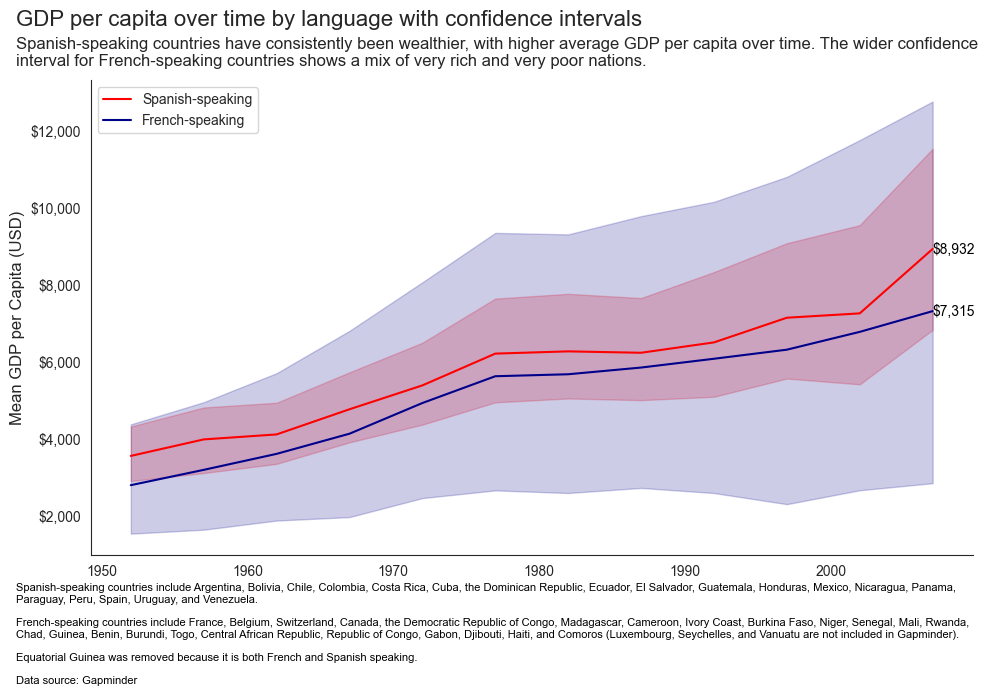

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the line chart with confidence intervals
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='year', y='gdpPercap', hue='Language', palette=palette)

# Adding title and subtitle
plt.title('GDP per capita over time by language with confidence intervals\n\n\n', fontsize=16, x=0.27, y=0.95)
plt.figtext(0.021, 0.88, 'Spanish-speaking countries have consistently been wealthier, with higher average GDP per capita over time. The wider confidence\ninterval for French-speaking countries shows a mix of very rich and very poor nations.', fontsize=12)

# Adding labels
plt.xlabel('')
plt.ylabel('Mean GDP per Capita (USD)', fontsize=12)

# Format y-axis to show USD with commas
formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Add annotations for the final values
languages = filtered_df['Language'].unique()  # Get unique languages
for language in languages:
    # Get the subset of the dataframe for the current language
    subset = filtered_df[filtered_df['Language'] == language]
    
    # Get the last year and corresponding GDP for the current language
    last_year = subset['year'].max()
    last_gdp = subset[subset['year'] == last_year]['gdpPercap'].mean()
    
    # Annotate the final GDP value at the last year for each language
    plt.text(last_year, last_gdp, f'${last_gdp:,.0f}', 
             horizontalalignment='left', 
             verticalalignment='center', 
             fontsize=10, 
             color='black')
    
# Add a note below the plot
plt.figtext(0.021, -0.15, 'Spanish-speaking countries include Argentina, Bolivia, Chile, Colombia, Costa Rica, Cuba, the Dominican Republic, Ecuador, El Salvador, Guatemala, Honduras, Mexico, Nicaragua, Panama,\nParaguay, Peru, Spain, Uruguay, and Venezuela.\n\nFrench-speaking countries include France, Belgium, Switzerland, Canada, the Democratic Republic of Congo, Madagascar, Cameroon, Ivory Coast, Burkina Faso, Niger, Senegal, Mali, Rwanda,\nChad, Guinea, Benin, Burundi, Togo, Central African Republic, Republic of Congo, Gabon, Djibouti, Haiti, and Comoros (Luxembourg, Seychelles, and Vanuatu are not included in Gapminder).\n\nEquatorial Guinea was removed because it is both French and Spanish speaking.\n\nData source: Gapminder', 
            fontsize=8, color='black')

# Adjust the legend location
plt.legend(loc='upper left')

sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout to avoid cutting off elements

# Save plot as PNG
plt.savefig("plot2_en.png", dpi=300, bbox_inches="tight")

plt.show()


Spanish version:

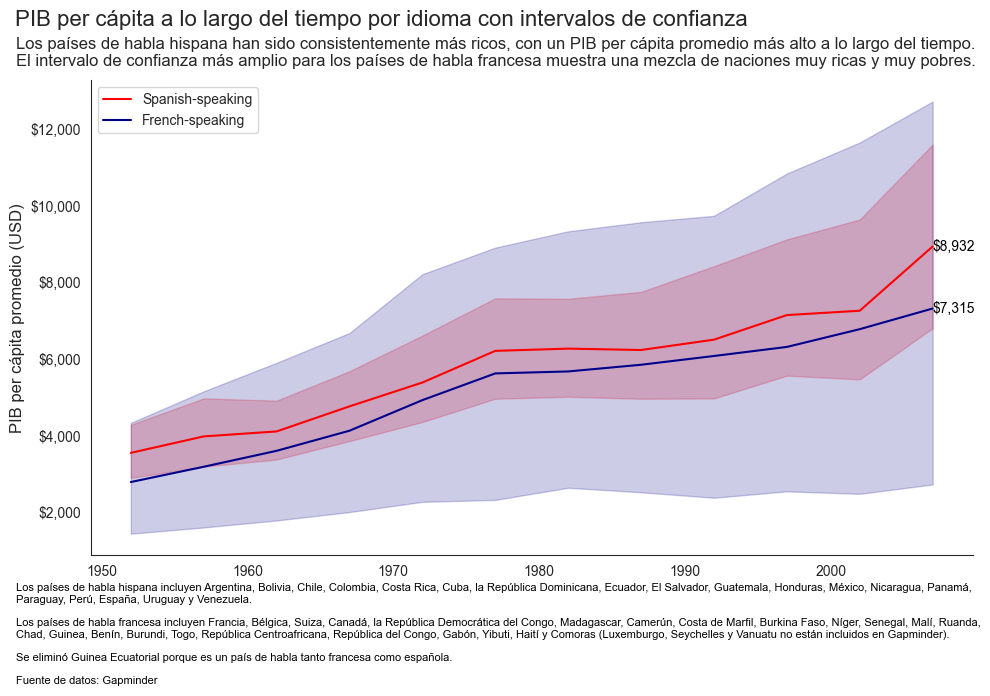

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the line chart with confidence intervals
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='year', y='gdpPercap', hue='Language', palette=palette)

# Adding title and subtitle
plt.title('PIB per cápita a lo largo del tiempo por idioma con intervalos de confianza\n\n\n', fontsize=16, x=0.33, y=0.95)
plt.figtext(0.021, 0.88, 'Los países de habla hispana han sido consistentemente más ricos, con un PIB per cápita promedio más alto a lo largo del tiempo.\nEl intervalo de confianza más amplio para los países de habla francesa muestra una mezcla de naciones muy ricas y muy pobres.', fontsize=12)

# Adding labels
plt.xlabel('')
plt.ylabel('PIB per cápita promedio (USD)', fontsize=12)

# Format y-axis to show USD with commas
formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Add annotations for the final values
languages = filtered_df['Language'].unique()  # Get unique languages
for language in languages:
    # Get the subset of the dataframe for the current language
    subset = filtered_df[filtered_df['Language'] == language]
    
    # Get the last year and corresponding GDP for the current language
    last_year = subset['year'].max()
    last_gdp = subset[subset['year'] == last_year]['gdpPercap'].mean()
    
    # Annotate the final GDP value at the last year for each language
    plt.text(last_year, last_gdp, f'${last_gdp:,.0f}', 
             horizontalalignment='left', 
             verticalalignment='center', 
             fontsize=10, 
             color='black')
    
# Add a note below the plot
plt.figtext(0.021, -0.15, 'Los países de habla hispana incluyen Argentina, Bolivia, Chile, Colombia, Costa Rica, Cuba, la República Dominicana, Ecuador, El Salvador, Guatemala, Honduras, México, Nicaragua, Panamá,\nParaguay, Perú, España, Uruguay y Venezuela.\n\nLos países de habla francesa incluyen Francia, Bélgica, Suiza, Canadá, la República Democrática del Congo, Madagascar, Camerún, Costa de Marfil, Burkina Faso, Níger, Senegal, Malí, Ruanda,\nChad, Guinea, Benín, Burundi, Togo, República Centroafricana, República del Congo, Gabón, Yibuti, Haití y Comoras (Luxemburgo, Seychelles y Vanuatu no están incluidos en Gapminder).\n\nSe eliminó Guinea Ecuatorial porque es un país de habla tanto francesa como española.\n\nFuente de datos: Gapminder', 
            fontsize=8, color='black')

# Adjust the legend location
plt.legend(loc='upper left')

sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout to avoid cutting off elements

# Save plot as PNG
plt.savefig("plot2_es.png", dpi=300, bbox_inches="tight")

plt.show()

## Plot 3: GDP per capita over time by language with confidence intervals including all countries

English version:

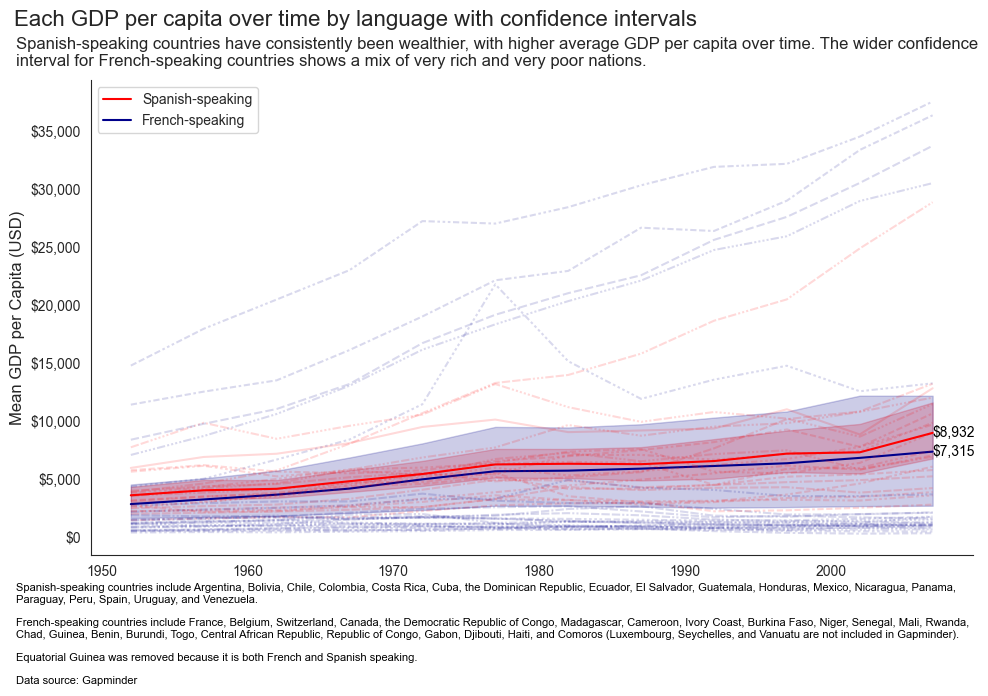

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# First plot: GDP per Capita Over Time by Language (with no confidence intervals)
sns.lineplot(data=filtered_df, x='year', y='gdpPercap', hue='Language', ax=ax, palette=palette)

# Second plot: GDP per Capita Over Time by Country and Language with reduced opacity
sns.lineplot(data=filtered_df, x='year', y='gdpPercap', hue='Language', style='country', ax=ax, alpha=0.15, legend=False, palette=palette)  # Remove legend for this plot

# Adding title and subtitle
plt.title('Each GDP per capita over time by language with confidence intervals\n\n\n', fontsize=16, x=0.30, y=0.95)
plt.figtext(0.021, 0.88, 'Spanish-speaking countries have consistently been wealthier, with higher average GDP per capita over time. The wider confidence\ninterval for French-speaking countries shows a mix of very rich and very poor nations.', fontsize=12)

# Adding labels
plt.xlabel('')
plt.ylabel('Mean GDP per Capita (USD)', fontsize=12)

# Format y-axis to show USD with commas
formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Add annotations for the final values
languages = filtered_df['Language'].unique()  # Get unique languages
for language in languages:
    # Get the subset of the dataframe for the current language
    subset = filtered_df[filtered_df['Language'] == language]
    
    # Get the last year and corresponding GDP for the current language
    last_year = subset['year'].max()
    last_gdp = subset[subset['year'] == last_year]['gdpPercap'].mean()
    
    # Annotate the final GDP value at the last year for each language
    plt.text(last_year, last_gdp, f'${last_gdp:,.0f}', 
             horizontalalignment='left', 
             verticalalignment='center', 
             fontsize=10, 
             color='black')
    
# Add a note below the plot
plt.figtext(0.021, -0.15, 'Spanish-speaking countries include Argentina, Bolivia, Chile, Colombia, Costa Rica, Cuba, the Dominican Republic, Ecuador, El Salvador, Guatemala, Honduras, Mexico, Nicaragua, Panama,\nParaguay, Peru, Spain, Uruguay, and Venezuela.\n\nFrench-speaking countries include France, Belgium, Switzerland, Canada, the Democratic Republic of Congo, Madagascar, Cameroon, Ivory Coast, Burkina Faso, Niger, Senegal, Mali, Rwanda,\nChad, Guinea, Benin, Burundi, Togo, Central African Republic, Republic of Congo, Gabon, Djibouti, Haiti, and Comoros (Luxembourg, Seychelles, and Vanuatu are not included in Gapminder).\n\nEquatorial Guinea was removed because it is both French and Spanish speaking.\n\nData source: Gapminder', 
            fontsize=8, color='black')

# Adjust the legend location
plt.legend(loc='upper left')

sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout to avoid cutting off elements

# Save plot as PNG
plt.savefig("plot3_en.png", dpi=300, bbox_inches="tight")

plt.show()

Spanish version:

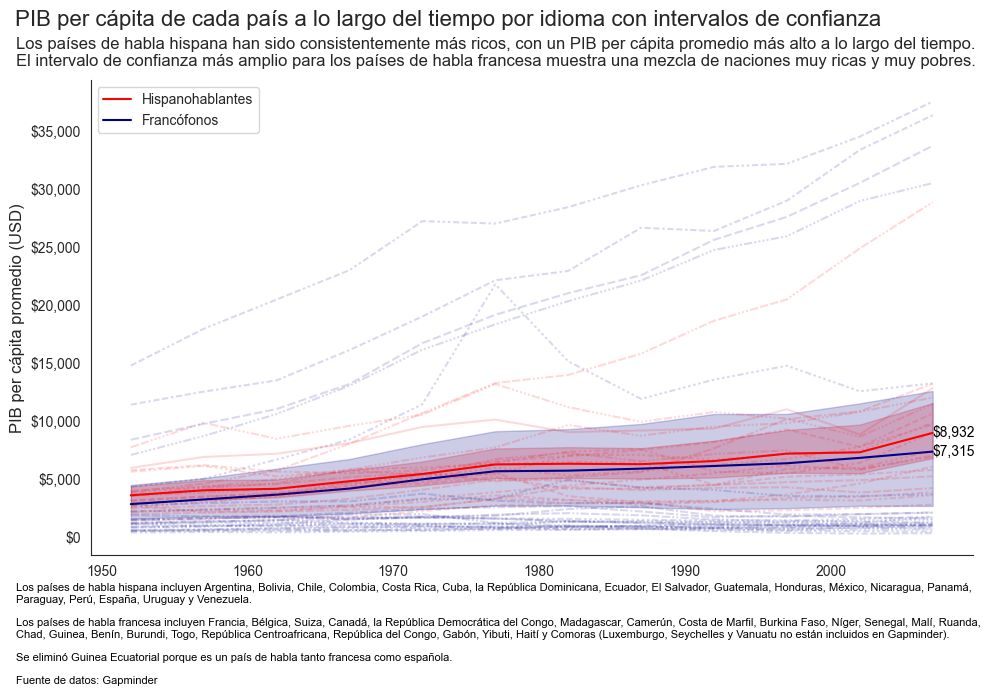

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# First plot: GDP per Capita Over Time by Language (with no confidence intervals)
sns.lineplot(data=filtered_df, x='year', y='gdpPercap', hue='Lenguaje', ax=ax, palette=palette_spa)

# Second plot: GDP per Capita Over Time by Country and Language with reduced opacity
sns.lineplot(data=filtered_df, x='year', y='gdpPercap', hue='Lenguaje', style='country', ax=ax, alpha=0.15, legend=False, palette=palette_spa)  # Remove legend for this plot

# Adding title and subtitle
plt.title('PIB per cápita de cada país a lo largo del tiempo por idioma con intervalos de confianza\n\n\n', fontsize=16, x=0.405, y=0.95)
plt.figtext(0.021, 0.88, 'Los países de habla hispana han sido consistentemente más ricos, con un PIB per cápita promedio más alto a lo largo del tiempo.\nEl intervalo de confianza más amplio para los países de habla francesa muestra una mezcla de naciones muy ricas y muy pobres.', fontsize=12)

# Adding labels
plt.xlabel('')
plt.ylabel('PIB per cápita promedio (USD)', fontsize=12)

# Format y-axis to show USD with commas
formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Add annotations for the final values
languages = filtered_df['Language'].unique()  # Get unique languages
for language in languages:
    # Get the subset of the dataframe for the current language
    subset = filtered_df[filtered_df['Language'] == language]
    
    # Get the last year and corresponding GDP for the current language
    last_year = subset['year'].max()
    last_gdp = subset[subset['year'] == last_year]['gdpPercap'].mean()
    
    # Annotate the final GDP value at the last year for each language
    plt.text(last_year, last_gdp, f'${last_gdp:,.0f}', 
             horizontalalignment='left', 
             verticalalignment='center', 
             fontsize=10, 
             color='black')
    
# Add a note below the plot
plt.figtext(0.021, -0.15, 'Los países de habla hispana incluyen Argentina, Bolivia, Chile, Colombia, Costa Rica, Cuba, la República Dominicana, Ecuador, El Salvador, Guatemala, Honduras, México, Nicaragua, Panamá,\nParaguay, Perú, España, Uruguay y Venezuela.\n\nLos países de habla francesa incluyen Francia, Bélgica, Suiza, Canadá, la República Democrática del Congo, Madagascar, Camerún, Costa de Marfil, Burkina Faso, Níger, Senegal, Malí, Ruanda,\nChad, Guinea, Benín, Burundi, Togo, República Centroafricana, República del Congo, Gabón, Yibuti, Haití y Comoras (Luxemburgo, Seychelles y Vanuatu no están incluidos en Gapminder).\n\nSe eliminó Guinea Ecuatorial porque es un país de habla tanto francesa como española.\n\nFuente de datos: Gapminder', 
            fontsize=8, color='black')

# Adjust the legend location
plt.legend(loc='upper left')

sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout to avoid cutting off elements

# Save plot as PNG
plt.savefig("plot3_es.png", dpi=300, bbox_inches="tight")

plt.show()